In [1]:
%cd ..
from src.utils import *
from src.algos import *
import os

c:\Users\wojte\Desktop\essa-tsp-metaheuristics


## Data Loading

In [2]:
distances = load_data(os.path.join("data", "Data_TSP_29.xlsx"))


## Settings - One sample

In [9]:
POP_SIZE = 500
N_ITERS = 10
SELECTION_METHOD = "tournament" # truncation roulette tournament
CROSSOVER_METHOD = "pmx" # pmx ox
ELITE_SIZE = 0
MATING_POOL_SIZE = .5
MUTATION_RATE = .15
NEIGH_TYPE = "swap" # inversion insertion swap
VERBOSE = False

In [10]:
ga = GeneticAlgorithm(
    pop_size=POP_SIZE,
    n_iter=N_ITERS,
    selection_method=SELECTION_METHOD,
    crossover_method=CROSSOVER_METHOD,
    elite_size=ELITE_SIZE,
    mating_pool_size=MATING_POOL_SIZE,
    mutation_rate=MUTATION_RATE,
    mutation_type=NEIGH_TYPE,
    verbose=VERBOSE,
)
result = ga.solve(distances)
result

distance: 3067
algorithm: GENETIC ALGORITHM
Neighbourhood type: Swap
n_iter: 10
pop_size: 500
generations: 10
selection_method: tournament
crossover_method: pmx
elite_size: 0
mating_pool_size: 250
mutation_rate: 0.15

solving time: 9.368 s
history: [4437, 4149, 3873, 3721, 3579, 3376, 3301, 3206, 3124, 3067]

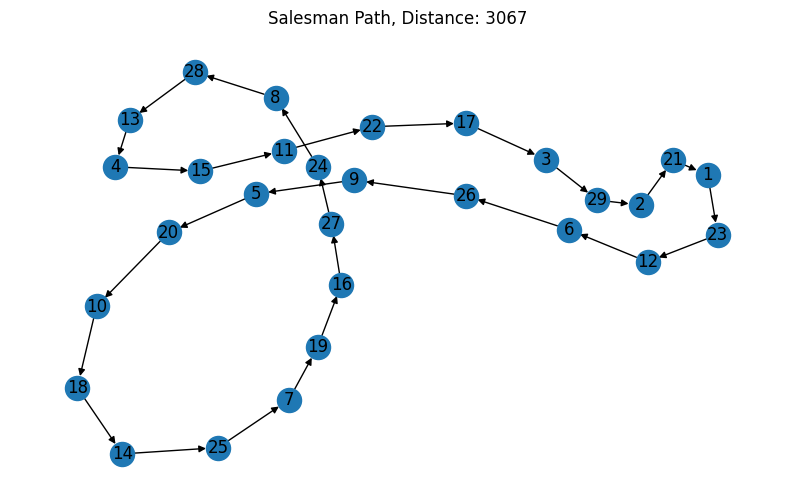

In [11]:
# Example of plotting the path
pp = PathPlotter()
pp.plot(result)

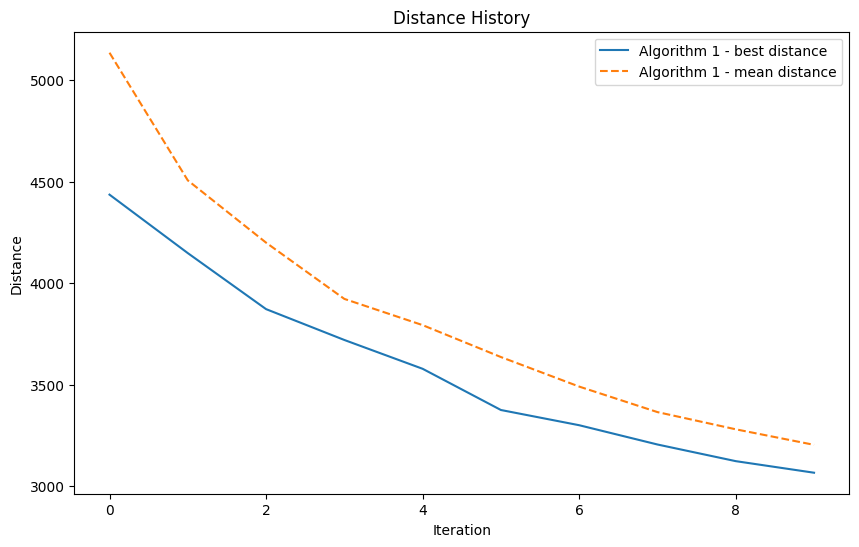

In [13]:
dhp = DistanceHistoryPlotter()
dhp.plot([result])

# Comparing multiple parameters

### STEP I - Make a list from the compared parameter

In [14]:
POP_SIZE = 50
N_ITERS = 10
SELECTION_METHOD = ["tournament", "truncation", "roulette"] # in this case, we will compare 3 different values of SELECTION_METHOD
CROSSOVER_METHOD = "pmx" # PMX OX
ELITE_SIZE = 0
MATING_POOL_SIZE = .5
MUTATION_RATE = .5
NEIGH_TYPE = "swap" # inversion insertion swap
VERBOSE = False

### STEP II - Run Models

In [16]:
results = []
for benchmarking_parameter in SELECTION_METHOD: # replace SELECTION_METHOD with any other parameter you want to compare
    ga = GeneticAlgorithm(
        pop_size=POP_SIZE,
        n_iter=N_ITERS,
        selection_method=benchmarking_parameter,  # comparing different values of SELECTION_METHOD, but any other parameter can be compare
        crossover_method=CROSSOVER_METHOD,
        elite_size=ELITE_SIZE,
        mating_pool_size=MATING_POOL_SIZE,
        mutation_rate=MUTATION_RATE,
        mutation_type=NEIGH_TYPE,
        verbose=VERBOSE,
    )
    some_result = ga.solve(distances)
    results.append(some_result) # Results are stored in a list

STEP III - Plots

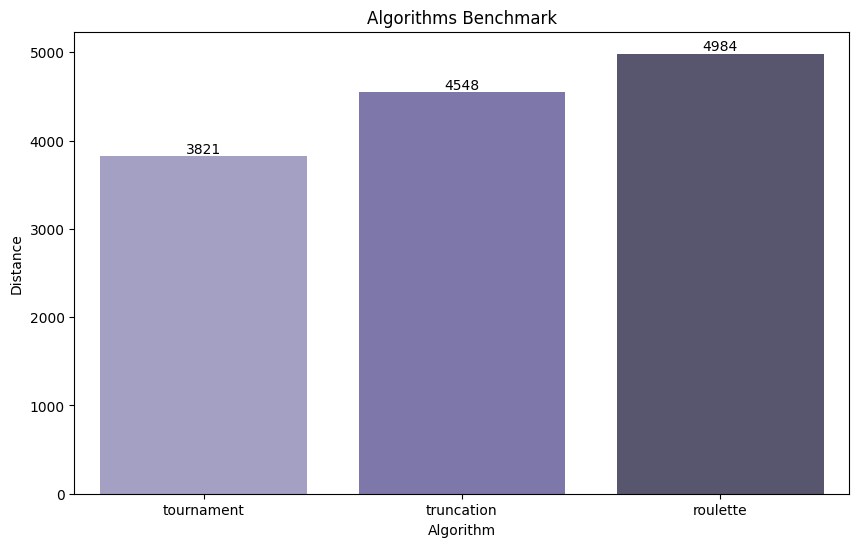

In [17]:
bp = BenchmarkPlotter()
bp.plot(results, labels=SELECTION_METHOD, palette="Purples_d")

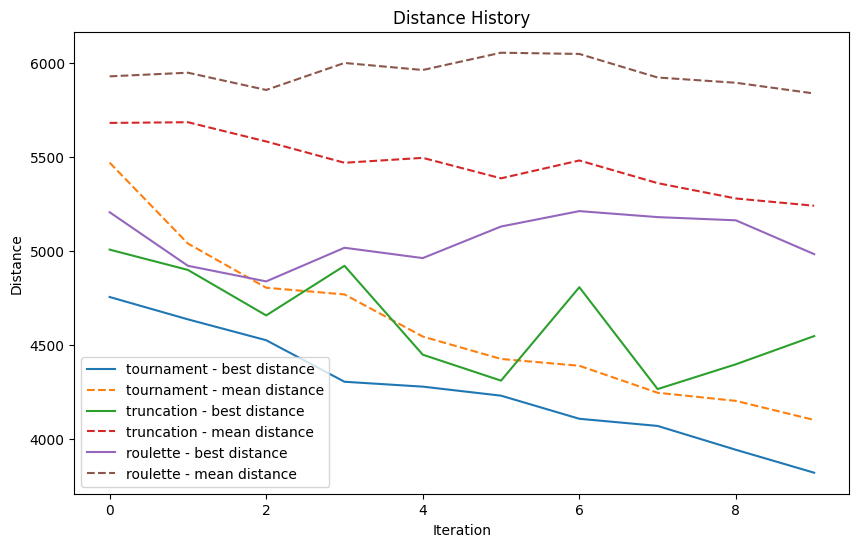

In [21]:
dhp = DistanceHistoryPlotter()
dhp.plot(results, labels=SELECTION_METHOD)

# Parallel approach

In [23]:
param_grid = {
    "pop_size": [100, 500],
    "n_iter": [10, 20],
    "selection_method": ["truncation", "roulette", "tournament"],
    "crossover_method": ["pmx", "ox"],
    "elite_size": [0, 0.1],
    "mating_pool_size": [0.2, 0.5],
    "mutation_rate": [0.2, 0.7],
    "mutation_type": ["swap", "insertion", "inversion"]
}

In [25]:
gs = TSPGridSearch()
result = gs.solve(
    algorithm=GeneticAlgorithm,
    params=dict(list(param_grid.items())[0:2]), # taking only first 2 items - taking all params=param_grid,
    n_jobs=-1,
    n_starts=3,
    distances=distances,
    only_best=False,
    verbose=True
)
result

number of algorithms in grid search: 4

params: {'n_iter': 10, 'pop_size': 100}
GENETIC ALGORITHM
Neighbourhood type: None
n_iter: 10
pop_size: 100
        generations: 10
        selection_method: tournament
        crossover_method: pmx
        elite_size: 0
        mating_pool_size: 50
        mutation_rate: 0.5

Solving time for GENETIC ALGORITHM: 3.860 s - Parallel: True

params: {'n_iter': 10, 'pop_size': 500}
GENETIC ALGORITHM
Neighbourhood type: None
n_iter: 10
pop_size: 500
        generations: 10
        selection_method: tournament
        crossover_method: pmx
        elite_size: 0
        mating_pool_size: 250
        mutation_rate: 0.5

Solving time for GENETIC ALGORITHM: 13.896 s - Parallel: True

params: {'n_iter': 20, 'pop_size': 100}
GENETIC ALGORITHM
Neighbourhood type: None
n_iter: 20
pop_size: 100
        generations: 20
        selection_method: tournament
        crossover_method: pmx
        elite_size: 0
        mating_pool_size: 50
        mutation_rate: 0.5



,algorithm,path,distance,solving_time,size
0,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[29, 3, 21, 13, 11, 19, 15, 4, 10, 16, 27, 8, ...",2749,0.739463,29
1,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[14, 11, 19, 23, 7, 25, 15, 4, 10, 20, 13, 16,...",2780,0.759253,29
2,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[23, 21, 3, 29, 26, 5, 12, 9, 2, 15, 22, 17, 1...",3176,0.751017,29
3,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[17, 2, 3, 5, 21, 10, 13, 4, 15, 19, 14, 11, 7...",2742,11.758838,29
4,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[15, 20, 2, 29, 3, 26, 5, 9, 12, 21, 17, 14, 7...",2916,11.765008,29
5,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[28, 21, 2, 5, 26, 29, 3, 10, 18, 17, 14, 7, 2...",2931,11.968861,29
6,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[28, 1, 6, 12, 9, 5, 21, 2, 3, 29, 26, 13, 27,...",2500,1.580412,29
7,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[16, 7, 19, 25, 17, 18, 15, 4, 13, 20, 14, 22,...",2916,1.600388,29
8,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[14, 22, 17, 1, 24, 23, 7, 15, 4, 10, 11, 25, ...",3033,1.566468,29
9,GENETIC ALGORITHM\nNeighbourhood type: Swap\nn...,"[7, 23, 27, 8, 21, 5, 2, 20, 10, 4, 13, 16, 24...",2389,22.564835,29
